# Object detection using MobileNets

In this implementation of MobileNets I have used the pretrained MobileNets on Cifar10 dataset and test it on different dataset using OpenCV library, in oder to detect images from aerial vehicle we have to either train this model from scratch or we can also use transfer learning.

In [33]:
# importing the important libraries
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt
from imutils.video import FPS
import time

In [34]:
# importing the pretrained model
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe('MobileNetSSD_deploy.prototxt.txt', 'MobileNetSSD_deploy.caffemodel')
print("[INFO] model loaded...")


[INFO] loading model...
[INFO] model loaded...


In [35]:
# Defining the total classes in which model is trained
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
	"bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
	"dog", "horse", "motorbike", "person", "pottedplant", "sheep",
	"sofa", "train", "tvmonitor"]
# Giving random colors to each class
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))


In [36]:
# Object detection function
def object_detection(image):
#     size of image
    (h, w) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)
    # pass the blob through the network and obtain the detections and
    # predictions
    print("[INFO] computing object detections...")
    net.setInput(blob)
    detections = net.forward()
    # loop over the detections
    for i in np.arange(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with the
        # prediction
        confidence = detections[0, 0, i, 2]
        # filter out weak detections by ensuring the `confidence` is
        # greater than the minimum confidence
        if confidence > .60:
            # extract the index of the class label from the `detections`,
            # then compute the (x, y)-coordinates of the bounding box for
            # the object
            idx = int(detections[0, 0, i, 1])
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            # display the prediction
            label = "{}: {:.2f}%".format(CLASSES[idx], confidence * 100)
            print("[INFO] {}".format(label))
            cv2.rectangle(image, (startX, startY), (endX, endY),
                          COLORS[idx], 2)
            y = startY - 15 if startY - 15 > 15 else startY + 15
            cv2.putText(image, label, (startX, y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)
    return image



[INFO] computing object detections...
[INFO] dog: 88.34%
[INFO] horse: 98.64%
[INFO] person: 99.95%


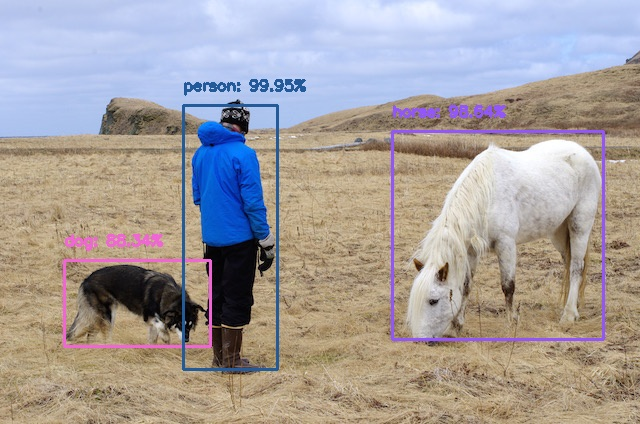

In [39]:
image=cv2.imread('testimages/sample_person.jpg')
image=object_detection(image)
# ploting image after detection
cv2.imwrite('result1.jpg',image)
Image('result1.jpg')


In [60]:
from IPython.display import Image,display

path=glob.glob('testimages/*jpg')


for i in path:
    image=cv2.imread(i)
    image=object_detection(image)
    cv2.imwrite('results/result'+i.split('/')[1],image)


    


    

[INFO] computing object detections...
[INFO] bicycle: 99.97%
[INFO] bicycle: 99.93%
[INFO] computing object detections...
[INFO] dog: 88.34%
[INFO] horse: 98.64%
[INFO] person: 99.95%
[INFO] computing object detections...
[INFO] person: 99.57%
[INFO] person: 92.57%
[INFO] person: 91.56%
[INFO] person: 88.56%
[INFO] person: 79.49%
[INFO] person: 70.43%
[INFO] computing object detections...
[INFO] aeroplane: 99.18%
[INFO] car: 95.91%
[INFO] computing object detections...
[INFO] train: 89.74%


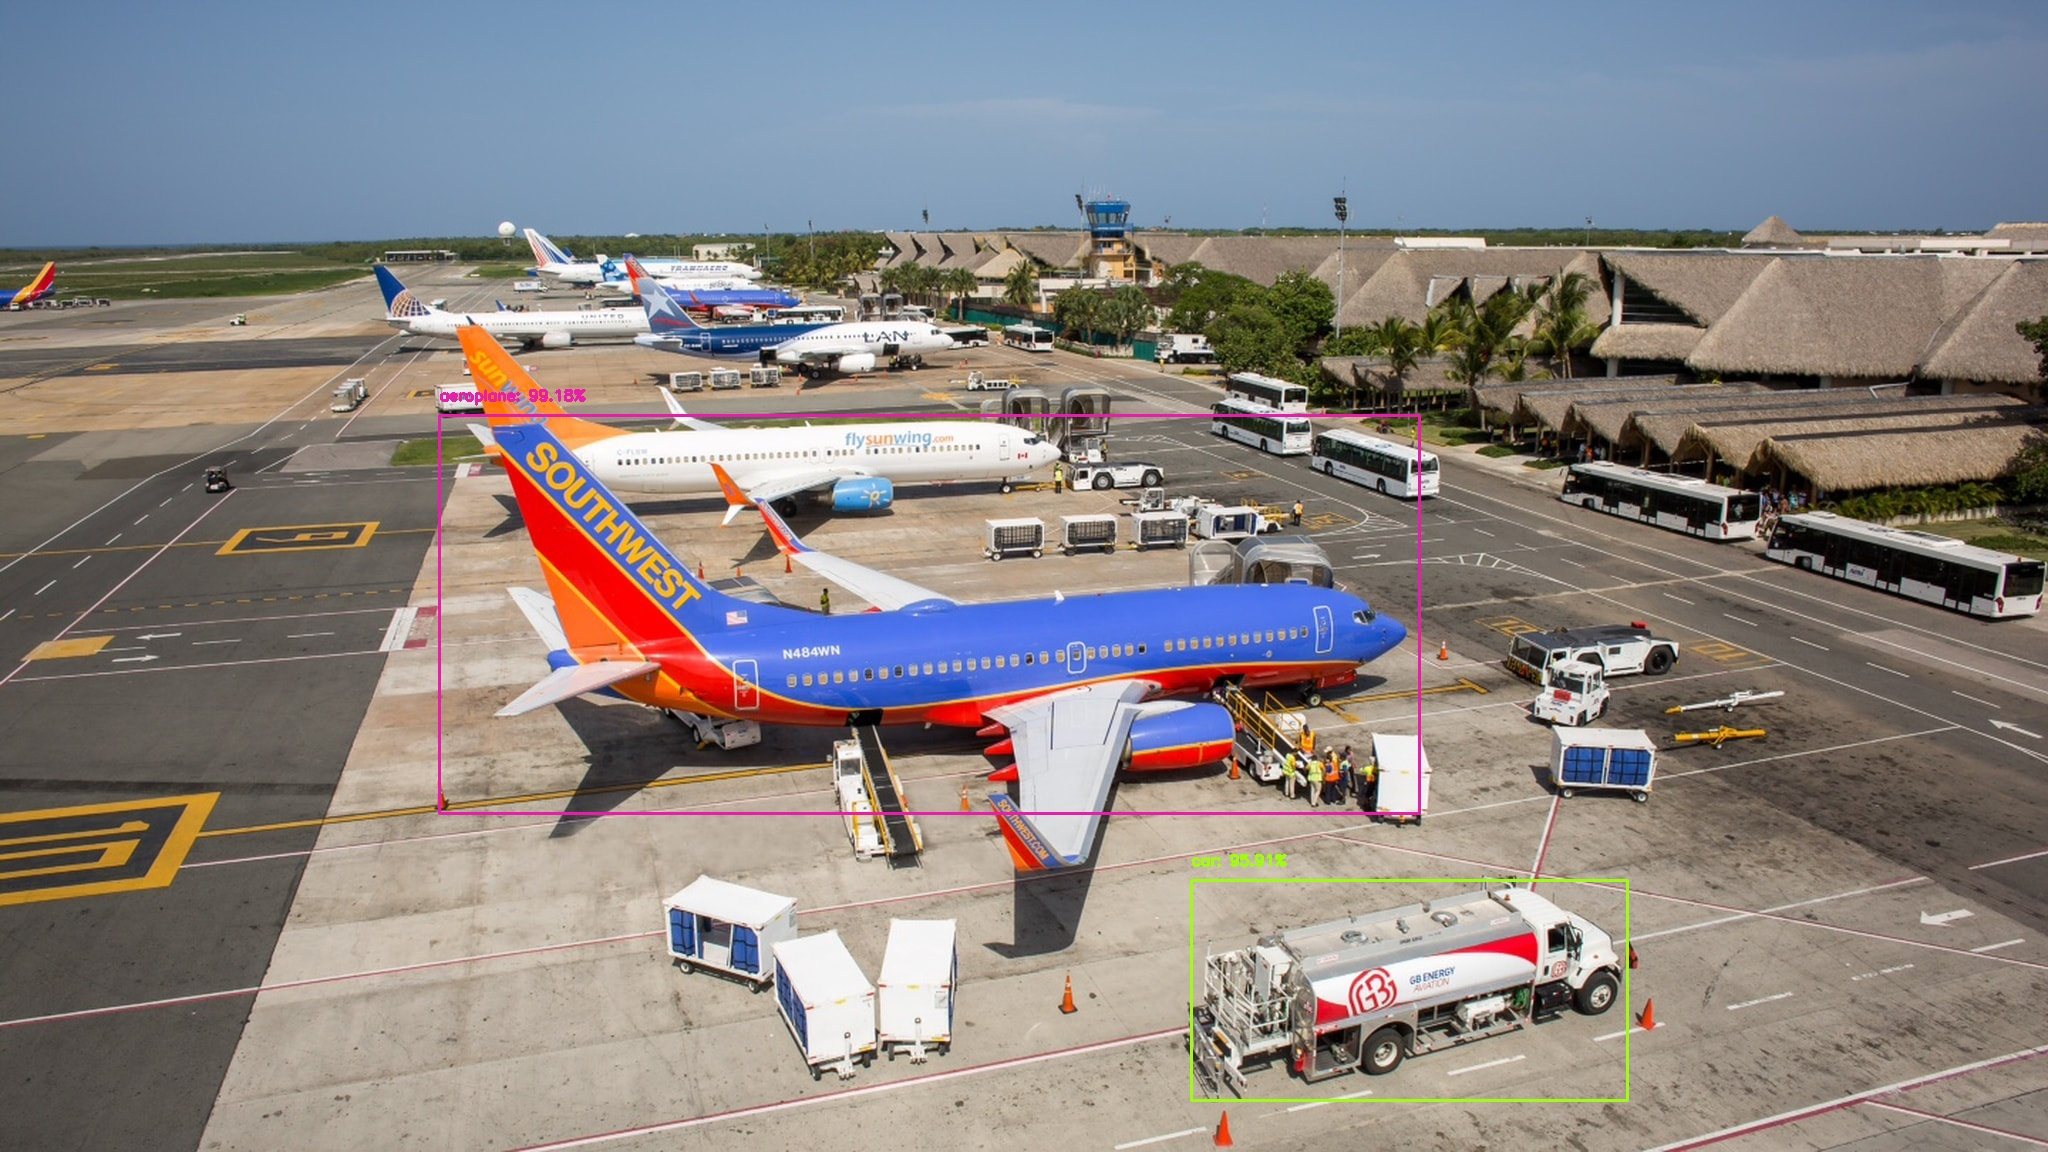

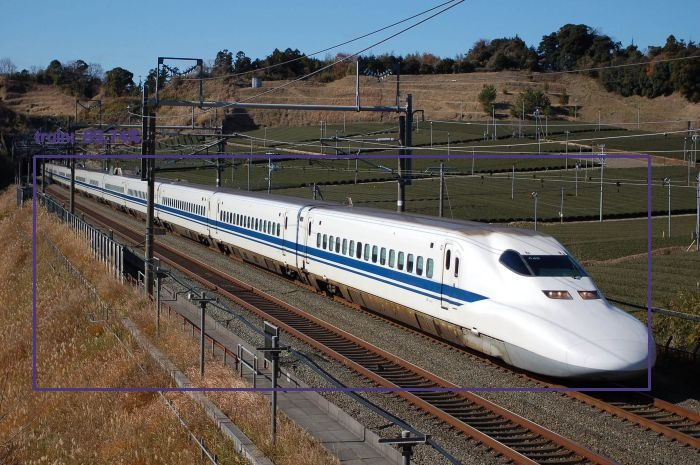

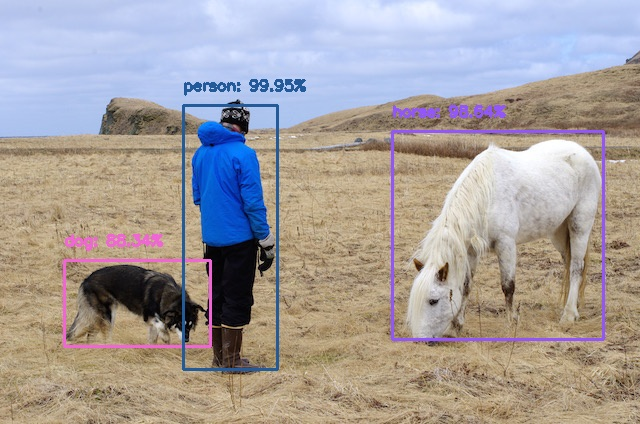

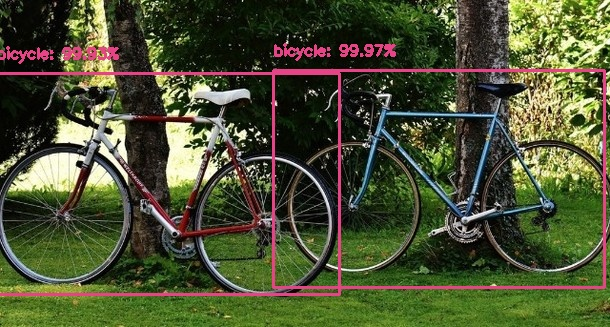

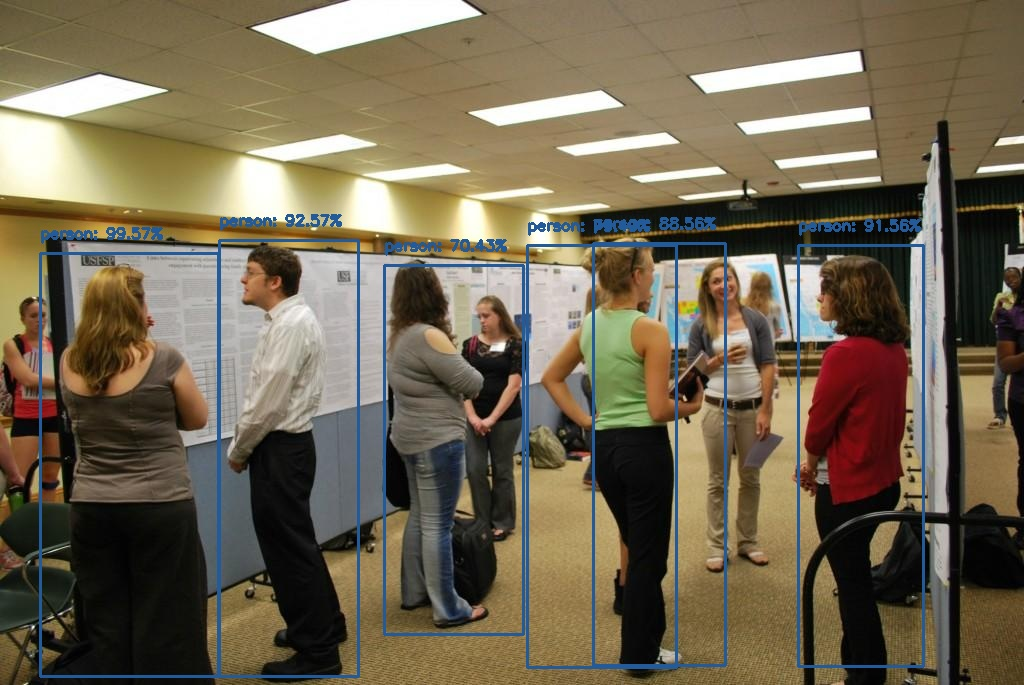

In [61]:
path=glob.glob('results//*jpg')

for i in path:
    display(Image(i))

    



Code for videos dataset

In [21]:
# path='/home/ashish/Desktop/final_pedesitrian_detection/seq02-img-left/*.png'
path='/home/ashish/Downloads/UrbanStreetRelease/Data/sequence01/images_left/*.jpg'

# path='final_pedesitrian_detection/seq03-img-left/*.png'


all_images=np.sort(glob.glob(path))
# # print(all_images)
# calculating frame per second 
fps = FPS().start()
for i in all_images:
#     reading the images from folder
	image=cv2.imread(i,1)
#     calling function
	image=object_detection(image)
	cv2.imshow('image',image)
	k = cv2.waitKey(30) & 0xff
	if k == 27:
		break
		
	fps.update()
	fps.stop()
	font = cv2.FONT_HERSHEY_SIMPLEX
	# cv2.putText(image,"FPS: {:.2f}".format(fps.fps()),(20,50), font, 1,(0,255,0),2,cv2.LINE_AA)

	print("[INFO] approx. FPS: {:.2f}".format(fps.fps()))



cv2.destroyAllWindows()


[INFO] computing object detections...
[INFO] car: 99.54%
[INFO] person: 73.76%
[INFO] person: 73.70%
[INFO] approx. FPS: 8.21
[INFO] computing object detections...
[INFO] car: 99.75%
[INFO] person: 99.80%
[INFO] person: 64.53%
[INFO] approx. FPS: 7.82
[INFO] computing object detections...
[INFO] car: 98.47%
[INFO] person: 99.35%
[INFO] approx. FPS: 7.99
[INFO] computing object detections...
[INFO] car: 99.92%
[INFO] person: 85.86%
[INFO] person: 69.46%
[INFO] approx. FPS: 7.80
[INFO] computing object detections...
[INFO] car: 99.99%
[INFO] person: 63.02%
[INFO] person: 60.82%
[INFO] approx. FPS: 7.87
[INFO] computing object detections...
[INFO] car: 99.93%
[INFO] person: 86.22%
[INFO] person: 82.27%
[INFO] approx. FPS: 7.18
[INFO] computing object detections...
[INFO] car: 99.62%
[INFO] person: 97.03%
[INFO] person: 84.81%
[INFO] person: 64.49%
[INFO] approx. FPS: 6.71
[INFO] computing object detections...
[INFO] car: 99.13%
[INFO] person: 92.66%
[INFO] person: 89.13%
[INFO] person: 88

[INFO] person: 94.99%
[INFO] person: 93.53%
[INFO] person: 88.39%
[INFO] person: 77.57%
[INFO] person: 70.21%
[INFO] person: 68.93%
[INFO] person: 67.77%
[INFO] approx. FPS: 7.55
[INFO] computing object detections...
[INFO] person: 96.43%
[INFO] person: 94.83%
[INFO] person: 87.11%
[INFO] person: 71.24%
[INFO] person: 69.42%
[INFO] person: 67.49%
[INFO] approx. FPS: 7.56
[INFO] computing object detections...
[INFO] person: 98.70%
[INFO] person: 98.47%
[INFO] person: 88.78%
[INFO] person: 76.33%
[INFO] approx. FPS: 7.57
[INFO] computing object detections...
[INFO] person: 97.93%
[INFO] person: 93.90%
[INFO] person: 68.81%
[INFO] approx. FPS: 7.58
[INFO] computing object detections...
[INFO] person: 97.96%
[INFO] person: 92.78%
[INFO] person: 71.88%
[INFO] person: 70.70%
[INFO] person: 69.25%
[INFO] approx. FPS: 7.59
[INFO] computing object detections...
[INFO] person: 99.01%
[INFO] person: 94.59%
[INFO] person: 70.40%
[INFO] person: 65.88%
[INFO] approx. FPS: 7.61
[INFO] computing objec

## Results on videos


[Youtube link-1](https://youtu.be/j2UnB1s13Zs)<br />
[YouTube link-2](https://youtu.be/ENVKXyti67M)